<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [136]:
# import 'Numpy' 
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#### Load the Life expectancy dataset and display the first five records 

In [42]:
df_lexp = pd.read_csv('Life_Expectancy.csv')
df_lexp.head()

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.000000,62,0.010000,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,65.000000
1,Albania,2015,Developing,74.000000,0,4.600000,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,77.800000
2,Algeria,2015,Developing,19.000000,21,nan,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,75.600000
3,Angola,2015,Developing,335.000000,66,nan,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,52.400000
4,Antigua,2015,Developing,13.000000,0,nan,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,nan,3.300000,3.300000,0.784000,13.900000,76.400000


#### Check the shape of the data and display its information

In [4]:
df_lexp.shape

(182, 20)

In [5]:
df_lexp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            182 non-null    object 
 1   Year               182 non-null    int64  
 2   Status             182 non-null    object 
 3   Adult_Mortality    173 non-null    float64
 4   Infant_Deaths      182 non-null    int64  
 5   Alcohol            15 non-null     float64
 6   Hepatitis B        173 non-null    float64
 7   Measles            182 non-null    int64  
 8   BMI                178 non-null    float64
 9   Underfive_Deaths   182 non-null    int64  
 10  Polio              182 non-null    int64  
 11  Diphtheria         182 non-null    int64  
 12  HIV                182 non-null    float64
 13  GDP                157 non-null    float64
 14  Population         141 non-null    float64
 15  Malnourished10_19  178 non-null    float64
 16  Malnourished5_9    178 non

In [6]:
df_lexp.describe()

,Year,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,182.000000,173.000000,182.000000,15.000000,173.000000,182.000000,178.000000,182.000000,182.000000,182.000000,182.000000,157.000000,141.000000,178.000000,178.000000,169.000000,173.000000,173.000000
mean,2014.890110,149.971098,21.741758,2.719333,81.710983,1482.104396,44.411236,28.851648,82.961538,84.357143,0.620330,7098.949079,11332500.742411,4.368539,4.412360,0.696586,12.845665,72.007514
std,0.457003,95.679846,82.297159,3.887194,25.391991,7859.929395,21.305610,105.904392,24.973658,22.958019,1.332830,11603.099478,29120654.198998,4.137007,4.223363,0.152706,3.215180,8.032405
min,2013.000000,1.000000,0.000000,0.010000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.100000,33.681223,292.000000,0.100000,0.100000,0.347000,0.000000,51.000000
25%,2015.000000,74.000000,0.000000,0.010000,78.000000,0.000000,24.425000,0.000000,83.250000,84.000000,0.100000,762.261218,263531.000000,1.500000,1.400000,0.575000,10.800000,66.200000
50%,2015.000000,137.000000,2.000000,0.010000,93.000000,9.000000,52.650000,2.000000,93.000000,94.000000,0.100000,3111.762887,1977527.000000,3.150000,3.250000,0.733000,13.100000,74.100000
75%,2015.000000,199.000000,15.000000,5.285000,97.000000,197.250000,62.100000,19.500000,97.750000,97.000000,0.300000,6993.477360,11273661.000000,6.400000,6.200000,0.799000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,10.660000,99.000000,90387.000000,87.300000,1100.000000,99.000000,99.000000,9.300000,66346.522670,258162113.000000,26.700000,27.300000,0.948000,20.400000,88.000000


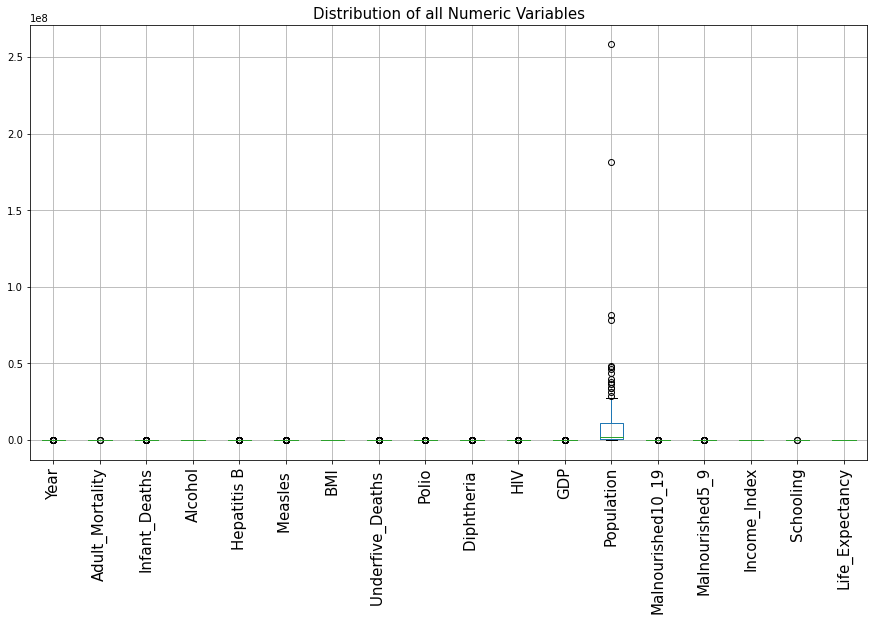

In [8]:
plt.figure(figsize = (15,8))

df_lexp.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
df_lexp.isnull().sum()

Country                0
Year                   0
Status                 0
Adult_Mortality        9
Infant_Deaths          0
Alcohol              167
Hepatitis B            9
Measles                0
BMI                    4
Underfive_Deaths       0
Polio                  0
Diphtheria             0
HIV                    0
GDP                   25
Population            41
Malnourished10_19      4
Malnourished5_9        4
Income_Index          13
Schooling              9
Life_Expectancy        9
dtype: int64

In [44]:
le_miss = df_lexp[df_lexp.Life_Expectancy.isnull()]
le_miss.iloc[:,0:1]

,Country
46,Dominica
100,Marshall Islands
104,Monaco
111,Nauru
118,Niue
122,Palau
135,Saint Kitts and Nevis
138,San Marino
168,Tuvalu


In [45]:
#df1 = df_lexp[(df_lexp.Year == 2013) & (df_lexp.Status == 'Developing')]['Life_Expectancy'].mean()
developing_mean = df_lexp[df_lexp.Status == 'Developing']['Life_Expectancy'].mean()
print("Mean of developing country's Life_Expectancy:", developing_mean)

Mean of developing country's Life_Expectancy: 70.03262411347517


In [46]:
df_lexp.Life_Expectancy.fillna(value=developing_mean, inplace=True)
df_lexp.Life_Expectancy.isnull().sum()

0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [86]:
miss = df_lexp.isnull().sum()[df_lexp.isnull().sum() > 0].sort_values(ascending=False) 
percent = (miss*100/df_lexp.shape[0]).sort_values(ascending=False)   
percent = percent[percent > 0]

missing_data = pd.concat([miss,percent], axis = 1, keys = ['Missing values', 'Percentage'])    
missing_data

,Missing values,Percentage
Income_Index,13,7.142857
Schooling,9,4.945055
Hepatitis B,9,4.945055
Adult_Mortality,9,4.945055
Malnourished5_9,4,2.197802
Malnourished10_19,4,2.197802
BMI,4,2.197802


In [64]:
df_lexp.drop('Alcohol', axis=1, inplace=True)

In [78]:
df_lexp.groupby(by = "Status")["Population"].median()

Status
Developed    3327181.000000
Developing   1811624.000000
Name: Population, dtype: float64

In [82]:
# for i in len(range(182)):
#     if(df_lexp[i].Population.isnull == True):
#         if(df_lexp.Status == 'Developing'):
#             df_lexp['Population'].fillna(value = 1811624, inplace=True)
#         else:
#             df_lexp['Population'].fillna(value = 3327181, inplace=True)

In [83]:
indices = df_lexp[df_lexp["Population"].isnull()].index
for i in indices:
    if df_lexp.iloc[i,2] == "Developing":
        df_lexp.iloc[i,13] = 1811624
    else:
        df_lexp.iloc[i,13] = 3327181
        
df_lexp.isnull().sum()[df_lexp.isnull().sum() > 0]

Adult_Mortality       9
Hepatitis B           9
BMI                   4
GDP                  25
Malnourished10_19     4
Malnourished5_9       4
Income_Index         13
Schooling             9
dtype: int64

In [84]:
df_lexp.groupby(by = "Status")["GDP"].median()

Status
Developed    8974.315496
Developing   2124.662666
Name: GDP, dtype: float64

In [85]:
indices = df_lexp[df_lexp["GDP"].isnull()].index
for i in indices:
    if df_lexp.iloc[i,2] == "Developing":
        df_lexp.iloc[i,12] = 2124.66
    else:
        df_lexp.iloc[i,12] = 8974.31
        
df_lexp.isnull().sum()[df_lexp.isnull().sum() > 0]

Adult_Mortality       9
Hepatitis B           9
BMI                   4
Malnourished10_19     4
Malnourished5_9       4
Income_Index         13
Schooling             9
dtype: int64

In [88]:
df_lexp.groupby(by = "Status")["Income_Index"].mean()

Status
Developed    0.881966
Developing   0.658186
Name: Income_Index, dtype: float64

In [89]:
indices = df_lexp[df_lexp["Income_Index"].isnull()].index
for i in indices:
    if df_lexp.iloc[i,2] == "Developing":
        df_lexp.iloc[i,-3] = 0.658
    else:
        df_lexp.iloc[i,-3] = 0.882
        
df_lexp.isnull().sum()[df_lexp.isnull().sum() > 0]

Adult_Mortality      9
Hepatitis B          9
BMI                  4
Malnourished10_19    4
Malnourished5_9      4
Schooling            9
dtype: int64

In [93]:
df_lexp['Adult_Mortality'].fillna(df_lexp['Adult_Mortality'].mean(), inplace=True)
df_lexp['Hepatitis B'].fillna(df_lexp['Hepatitis B'].mean(), inplace=True)
df_lexp['BMI'].fillna(df_lexp['BMI'].mean(), inplace=True)
df_lexp['Malnourished10_19'].fillna(df_lexp['Malnourished10_19'].mean(), inplace=True)
df_lexp['Malnourished5_9'].fillna(df_lexp['Malnourished5_9'].mean(), inplace=True)
df_lexp['Schooling'].fillna(df_lexp['Schooling'].mean(), inplace=True)

df_lexp.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

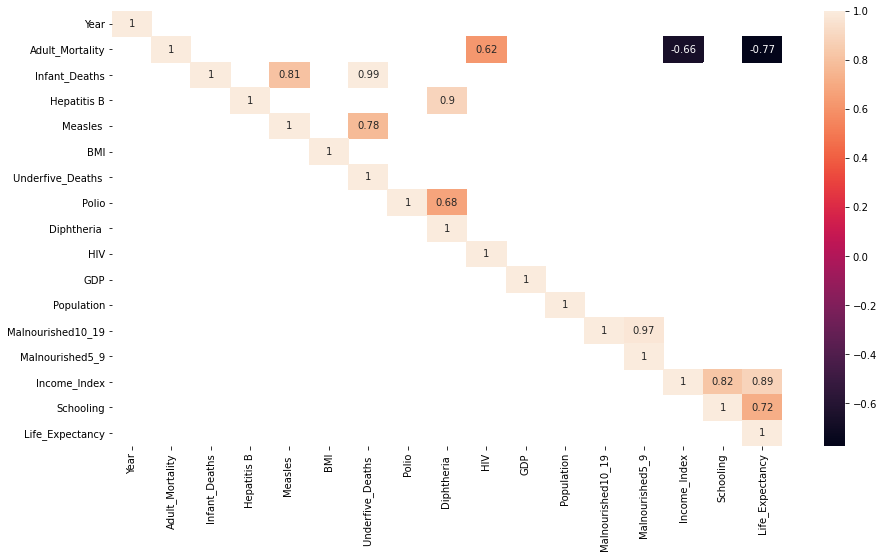

In [99]:
plt.figure(figsize = (15,8))
corr = df_lexp.corr()
corr_ut = corr.where(np.triu(np.ones(corr.shape)).astype(bool))
sns.heatmap(corr_ut[abs(corr_ut) >= 0.6],annot = True)

<b>Interpretation:</b> There is 0.99 correlation between infant deaths and underfive deaths, 0.97 correlation between Malnourished10_19 and Malnourished5_9, 0.9 correlation between Hep B and Diptheria. <br> These columns can be considered redundant as they are multi-colinear.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
encoded = pd.get_dummies(data=df_lexp, columns=['Year','Status'], drop_first=True)
X_all = encoded.drop(['Country', 'Life_Expectancy'], axis=1)
X_all.head()

,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Year_2015,Status_Developing
0,263.000000,62,65.000000,1154,19.100000,83,6,65,0.100000,584.259210,33736494.000000,17.200000,17.300000,0.479000,10.100000,1,1
1,74.000000,0,99.000000,0,58.000000,0,99,99,0.100000,3954.227830,28873.000000,1.200000,1.300000,0.762000,14.200000,1,1
2,19.000000,21,95.000000,63,59.500000,24,95,95,0.100000,4132.762920,39871528.000000,6.000000,5.800000,0.743000,14.400000,1,1
3,335.000000,66,64.000000,118,23.300000,98,7,64,1.900000,3695.793748,2785935.000000,8.300000,8.200000,0.531000,11.400000,1,1
4,13.000000,0,99.000000,0,47.700000,0,86,99,0.200000,13566.954100,1811624.000000,3.300000,3.300000,0.784000,13.900000,1,1


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [109]:
X = X_all
X.iloc[:, :] = X.iloc[:, :].apply(lambda rec: (rec - rec.mean()) / rec.std())

X = sm.add_constant(X)


In [112]:
y_exp = df_lexp['Life_Expectancy']
MLR_full = sm.OLS(y_exp,X).fit()
print(MLR_full.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     72.47
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           5.05e-67
Time:                        17:53:58   Log-Likelihood:                -437.69
No. Observations:                 182   AIC:                             911.4
Df Residuals:                     164   BIC:                             969.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.9099      0.20

In [113]:
# Constant Variance of residuals - Homoskedastic 
y_pred = MLR_full.predict(X)
y_pred.head()

0   59.666282
1   76.939188
2   76.875119
3   59.581944
4   78.506260
dtype: float64

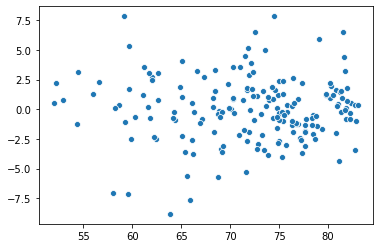

In [116]:
sns.scatterplot(x = y_pred, y=MLR_full.resid)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
df_lexp.columns

Index(['Country', 'Year', 'Status', 'Adult_Mortality', 'Infant_Deaths',
       'Hepatitis B', 'Measles ', 'BMI', 'Underfive_Deaths ', 'Polio',
       'Diphtheria ', 'HIV', 'GDP', 'Population', 'Malnourished10_19',
       'Malnourished5_9', 'Income_Index', 'Schooling', 'Life_Expectancy'],
      dtype='object')

In [130]:
x_imm = df_lexp[['Hepatitis B','Diphtheria ', 'Polio']]
x_imm = sm.add_constant(x_imm)
x_imm.head()

,const,Hepatitis B,Diphtheria,Polio
0,1.000000,65.000000,65,6
1,1.000000,99.000000,99,99
2,1.000000,95.000000,95,95
3,1.000000,64.000000,64,7
4,1.000000,99.000000,99,86


In [131]:
MLR_imm = sm.OLS(y_exp,x_imm).fit()
print(MLR_imm.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     28.78
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           3.19e-15
Time:                        18:04:56   Log-Likelihood:                -596.58
No. Observations:                 182   AIC:                             1201.
Df Residuals:                     178   BIC:                             1214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.2915      1.914     28.882      

In [132]:
y_p = MLR_imm.predict(x_imm)

sse = np.sum((y_exp - y_p)**2)
sse

7494.881007554877

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [133]:
x_mal = df_lexp[['Malnourished10_19','Malnourished5_9']]
x_mal = sm.add_constant(x_mal)

MLR_mal = sm.OLS(y_exp,x_mal).fit()
print(MLR_mal.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     23.98
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           5.93e-10
Time:                        18:06:45   Log-Likelihood:                -610.97
No. Observations:                 182   AIC:                             1228.
Df Residuals:                     179   BIC:                             1238.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                75.7617      0.76

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [146]:
x_am = df_lexp['Adult_Mortality']
x_am = sm.add_constant(x_am)

SLR_am = sm.OLS(y_exp,x_am).fit()
print(SLR_am.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     266.8
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           2.24e-37
Time:                        18:23:30   Log-Likelihood:                -549.84
No. Observations:                 182   AIC:                             1104.
Df Residuals:                     180   BIC:                             1110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              81.6533      0.702    1

In [153]:
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(x_am, y_exp)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(x_am, y_exp)

0.5971092858062809

In [155]:
sgd = SGDRegressor(random_state = 10)

linreg_with_SGD = sgd.fit(x_am, y_exp)

In [158]:
SLR_am.params

const             81.653278
Adult_Mortality   -0.064969
dtype: float64

In [156]:
linreg_with_SGD.coef_

array([-2.41148403e+10, -8.38670443e+10])

In [157]:
MLR_model.coef_

array([ 0.        , -0.06496867])

**Interpretation:** The coefficients obtained from SGD have higher values as compared to the coefficients obtained from linear regression using OLS.

In [167]:
X_all = sm.add_constant(X_all)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_exp, random_state = 10, test_size = 0.3)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (127, 18)
y_train (127,)
X_test (55, 18)
y_test (55,)


In [168]:
def get_train_rmse(model):
    train_pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, train_pred)
    rmse_train = round(np.sqrt(mse_train), 4)
    return(rmse_train)

def get_test_rmse(model):
    test_pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, test_pred)
    rmse_test = round(np.sqrt(mse_test), 4)
    return(rmse_test)

def plot_coefficients(model, algorithm_name):
    df_coeff = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.params})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)
    
def plot_coefficients1(model, algorithm_name):
    df_coeff = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.coef_})
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)
    plt.ylabel('Features', fontsize = 15)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [172]:
MLR_imm = sm.OLS(y_exp,x_imm).fit()
print(MLR_imm.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     28.78
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           3.19e-15
Time:                        19:51:31   Log-Likelihood:                -596.58
No. Observations:                 182   AIC:                             1201.
Df Residuals:                     178   BIC:                             1214.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.2915      1.914     28.882      

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [173]:
MLR_model = sm.OLS(y_train,X_train).fit()
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     55.32
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           1.47e-45
Time:                        19:52:20   Log-Likelihood:                -301.48
No. Observations:                 127   AIC:                             639.0
Df Residuals:                     109   BIC:                             690.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.6402      0.25

In [175]:
print('RMSE on train set: ', get_train_rmse(MLR_model))

X_test = sm.add_constant(X_test)
# print training RMSE
print('RMSE on test set: ', get_test_rmse(MLR_model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  2.5984
RMSE on test set:  4.5528
Difference between RMSE on train and test set:  1.9544000000000006


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [176]:
print(MLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_Expectancy   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     55.32
Date:                Thu, 18 Feb 2021   Prob (F-statistic):           1.47e-45
Time:                        19:55:29   Log-Likelihood:                -301.48
No. Observations:                 127   AIC:                             639.0
Df Residuals:                     109   BIC:                             690.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                71.6402      0.25

<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<b>Interpretation:</b> As seen from thr results of question 11, the multi-colinearity value CN = 86.4 is less than 100. Therefore we can perform regression analysis without eliminating features.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [177]:
X_train.columns

Index(['const', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis B', 'Measles ',
       'BMI', 'Underfive_Deaths ', 'Polio', 'Diphtheria ', 'HIV', 'GDP',
       'Population', 'Malnourished10_19', 'Malnourished5_9', 'Income_Index',
       'Schooling', 'Year_2015', 'Status_Developing'],
      dtype='object')

In [181]:
lasso = Lasso(alpha = 1.5, max_iter = 500)
lasso.fit(X_train[['Hepatitis B', 'Measles ','Polio', 'Diphtheria ', 'HIV']], y_train)

test_pred = lasso.predict(X_test[['Hepatitis B', 'Measles ','Polio', 'Diphtheria ', 'HIV']])
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print('RMSE on test set:', rmse_test)

RMSE on test set: 5.5346


In [188]:
df_lasso_coeff = pd.DataFrame({'Variable': ['Hepatitis B', 'Measles ','Polio', 'Diphtheria ', 'HIV'], 'Coefficient': lasso.coef_})

print('Significant variables obtained from Lasso Regression when alpha is 1.5:')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient != 0].to_list()

Significant variables obtained from Lasso Regression when alpha is 1.5:


['Polio', 'Diphtheria ', 'HIV']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [191]:
lasso = Lasso(alpha = 1, max_iter = 500)
lasso.fit(X_train[['Malnourished10_19', 'Malnourished5_9', 'Measles ', 'HIV']], y_train)

test_pred = lasso.predict(X_test[['Malnourished10_19', 'Malnourished5_9', 'Measles ', 'HIV']])
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print('RMSE on test set:', rmse_test)

RMSE on test set: 5.0982


In [192]:
df_lasso_coeff = pd.DataFrame({'Variable': ['Malnourished10_19', 'Malnourished5_9', 'Measles ', 'HIV'], 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 1:')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 1:


['Measles ']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [203]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.001, max_iter = 500)
enet.fit(X_train, y_train)

print('RMSE on train set: ', get_train_rmse(enet))
print('RMSE on test set:', get_test_rmse(enet))

RMSE on train set:  2.7911
RMSE on test set: 3.0433


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [195]:
lasso = Lasso(alpha = 0.5, max_iter = 500)
lasso.fit(X_train, y_train)
print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 3.0389


In [196]:
df_lasso_coeff = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': lasso.coef_})

print('Significant variables obtained from Lasso Regression when alpha is 0.5:')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient != 0].to_list()

Significant variables obtained from Lasso Regression when alpha is 0.5:


['Adult_Mortality',
 'Hepatitis B',
 'Polio',
 'HIV',
 'Income_Index',
 'Status_Developing']

<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [197]:
tuned_paramaters = [{'alpha':[7,8,9,10,11]}]
 
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, param_grid = tuned_paramaters)
ridge_grid.fit(X_train, y_train)

print('Best parameters for Ridge Regression: ', ridge_grid.best_params_)
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 11}
RMSE on test set: 3.0345


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [198]:
tuned_paramaters = [{'alpha':[7,8,9,10,11]}]
                     
lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso, param_grid = tuned_paramaters)
lasso_grid.fit(X_train, y_train)

print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 7} 

RMSE on test set: 7.0352


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [204]:
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]

enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, param_grid = tuned_paramaters)
enet_grid.fit(X_train[['Malnourished10_19', 'Malnourished5_9', 'Measles ', 'HIV']], y_train)

print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_)
test_pred = enet_grid.predict(X_test[['Malnourished10_19', 'Malnourished5_9', 'Measles ', 'HIV']])
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print('RMSE on test set:', rmse_test)

Best parameters for Elastic Net Regression:  {'alpha': 0.5, 'l1_ratio': 0.55}
RMSE on test set: 5.127


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [202]:
tuned_paramaters = [{'alpha':[0.8],
                      'l1_ratio':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}]

enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, param_grid = tuned_paramaters)
enet_grid.fit(X_train, y_train)

print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_)
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.8, 'l1_ratio': 1}
RMSE on test set: 3.1411
